In [1]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("OneDrive - Umich/Course/CHE 696 006/Final project/MUC/MUC_merged_PDAC_dataset.csv")
print(df.head())

      SAMPLE_ID                      Study ID  Number at Risk  Status  \
0  TCGA-IB-7887  paad_tcga_pan_can_atlas_2018              15       1   
1  TCGA-HV-A5A3  paad_tcga_pan_can_atlas_2018              14       1   
2  TCGA-2L-AAQA  paad_tcga_pan_can_atlas_2018              13       1   
3  TCGA-IB-AAUQ  paad_tcga_pan_can_atlas_2018              12       1   
4  TCGA-IB-A5SQ  paad_tcga_pan_can_atlas_2018              11       1   

   Survival Rate  Time_months   MUC1   MUC4  MUC2  
0       0.933333     3.616399 -0.002  0.312 -0.31  
1       0.866667     4.208173  0.543  0.505  0.00  
2       0.800000     4.701318  0.664  0.014  0.00  
3       0.733333     6.016372 -0.023  0.012  0.00  
4       0.666667     7.199921  0.232 -0.047 -0.05  


In [2]:
from sklearn.preprocessing import StandardScaler

# Assume df is your DataFrame containing the log2 copy number values
# For example, columns: 'MUC1', 'MUC2', 'MUC4'

# Create a scaler object
scaler = StandardScaler()

# Standardize the selected columns and assign them back to the same columns in the DataFrame
df[['MUC1', 'MUC2', 'MUC4']] = scaler.fit_transform(df[['MUC1', 'MUC2', 'MUC4']])
print(df.head())
print(df.shape)
print(df.dtypes)


      SAMPLE_ID                      Study ID  Number at Risk  Status  \
0  TCGA-IB-7887  paad_tcga_pan_can_atlas_2018              15       1   
1  TCGA-HV-A5A3  paad_tcga_pan_can_atlas_2018              14       1   
2  TCGA-2L-AAQA  paad_tcga_pan_can_atlas_2018              13       1   
3  TCGA-IB-AAUQ  paad_tcga_pan_can_atlas_2018              12       1   
4  TCGA-IB-A5SQ  paad_tcga_pan_can_atlas_2018              11       1   

   Survival Rate  Time_months      MUC1      MUC4      MUC2  
0       0.933333     3.616399 -0.463240  1.642995 -1.663734  
1       0.866667     4.208173  1.341920  2.744113  0.239315  
2       0.800000     4.701318  1.742698 -0.057177  0.239315  
3       0.733333     6.016372 -0.532797 -0.068588  0.239315  
4       0.666667     7.199921  0.311819 -0.405199 -0.067628  
(183, 9)
SAMPLE_ID          object
Study ID           object
Number at Risk      int64
Status              int64
Survival Rate     float64
Time_months       float64
MUC1              float6

In [3]:
from lifelines import CoxPHFitter
import pandas as pd

# df: your dataframe with 'MUC1', 'MUC2', 'MUC4', 'time', 'event' columns
cph = CoxPHFitter()
cph.fit(df[['MUC1', 'Time_months', 'Status']], duration_col='Time_months', event_col='Status')
cph.print_summary()  # Check p-values and hazard ratios

# Repeat for MUC2, MUC4

<lifelines.CoxPHFitter: fitted with 183 total observations, 84 right-censored observations>
             duration col = 'Time_months'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 183
number of events observed = 99
   partial log-likelihood = -440.20
         time fit was run = 2025-04-25 21:37:22 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
MUC1       0.01      1.01      0.08           -0.16            0.17                0.85                1.19

           cmp to    z    p  -log2(p)
covariate                            
MUC1         0.00 0.07 0.94      0.08
---
Concordance = 0.52
Partial AIC = 882.40
log-likelihood ratio test = 0.00 on 1 df
-log2(p) of ll-ratio test = 0.08

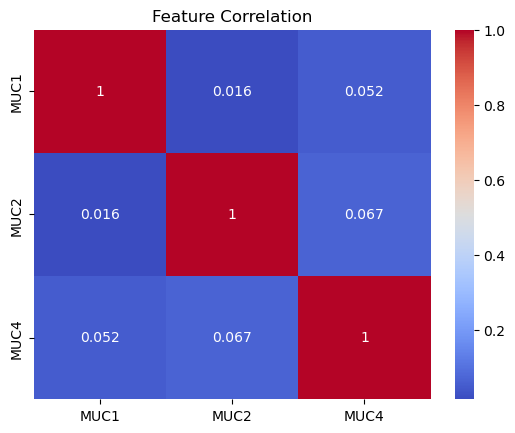

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['MUC1', 'MUC2', 'MUC4']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

k = 2: Silhouette Score = 0.574
k = 3: Silhouette Score = 0.632
k = 4: Silhouette Score = 0.653
k = 5: Silhouette Score = 0.558
k = 6: Silhouette Score = 0.570
k = 7: Silhouette Score = 0.577
k = 8: Silhouette Score = 0.556


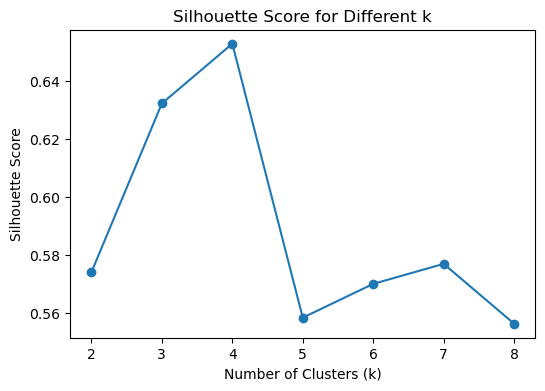

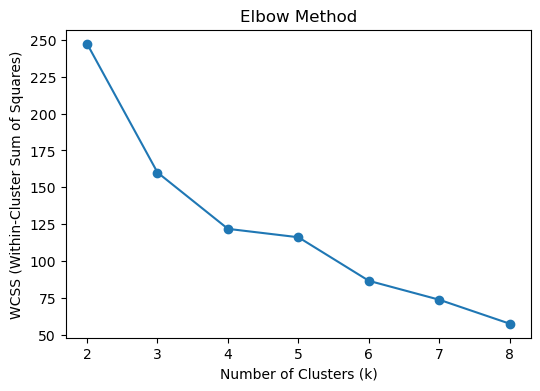

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the features (make sure these columns exist in your DataFrame 'df')
features = ['MUC1', 'MUC4']

# Extract the actual numerical feature values from the dataframe
X = df[features].values

# Evaluate k-means clustering for different k using silhouette score and elbow method
silhouette_scores = []
wcss = []
K_range = range(2, 9)  # Try k from 2 to 6

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    wcss.append(kmeans.inertia_)
    print(f"k = {k}: Silhouette Score = {score:.3f}")

# Plot silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(list(K_range), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

# Plot the elbow curve (WCSS)
plt.figure(figsize=(6, 4))
plt.plot(range(2, 9), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()


In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Assume df is your DataFrame with numeric columns "MUC1" and "MUC4" 
# and maybe some other non-numeric columns like sample IDs.
# Instead of passing the entire df, select only the numeric features:
X = df[['MUC1', 'MUC4']].values

# Now perform clustering on the numeric matrix X.
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg.fit_predict(X)
df["cluster_original"] = clusters

# For combining clusters: for example, keep cluster 0 as "Cluster 1" and combine others as "Other clusters"
df["final_cluster"] = df["cluster_original"].apply(lambda x: "Cluster 1" if x == 0 else "Other clusters")

print(df[["MUC1", "MUC4", "cluster_original", "final_cluster"]])

         MUC1      MUC4  cluster_original   final_cluster
0   -0.463240  1.642995                 2  Other clusters
1    1.341920  2.744113                 2  Other clusters
2    1.742698 -0.057177                 1  Other clusters
3   -0.532797 -0.068588                 0       Cluster 1
4    0.311819 -0.405199                 0       Cluster 1
..        ...       ...               ...             ...
178 -0.430118  0.279434                 0       Cluster 1
179 -0.552670 -0.353852                 0       Cluster 1
180  0.911331 -0.234041                 1  Other clusters
181 -0.334064 -0.622000                 0       Cluster 1
182 -2.205468 -0.074293                 0       Cluster 1

[183 rows x 4 columns]


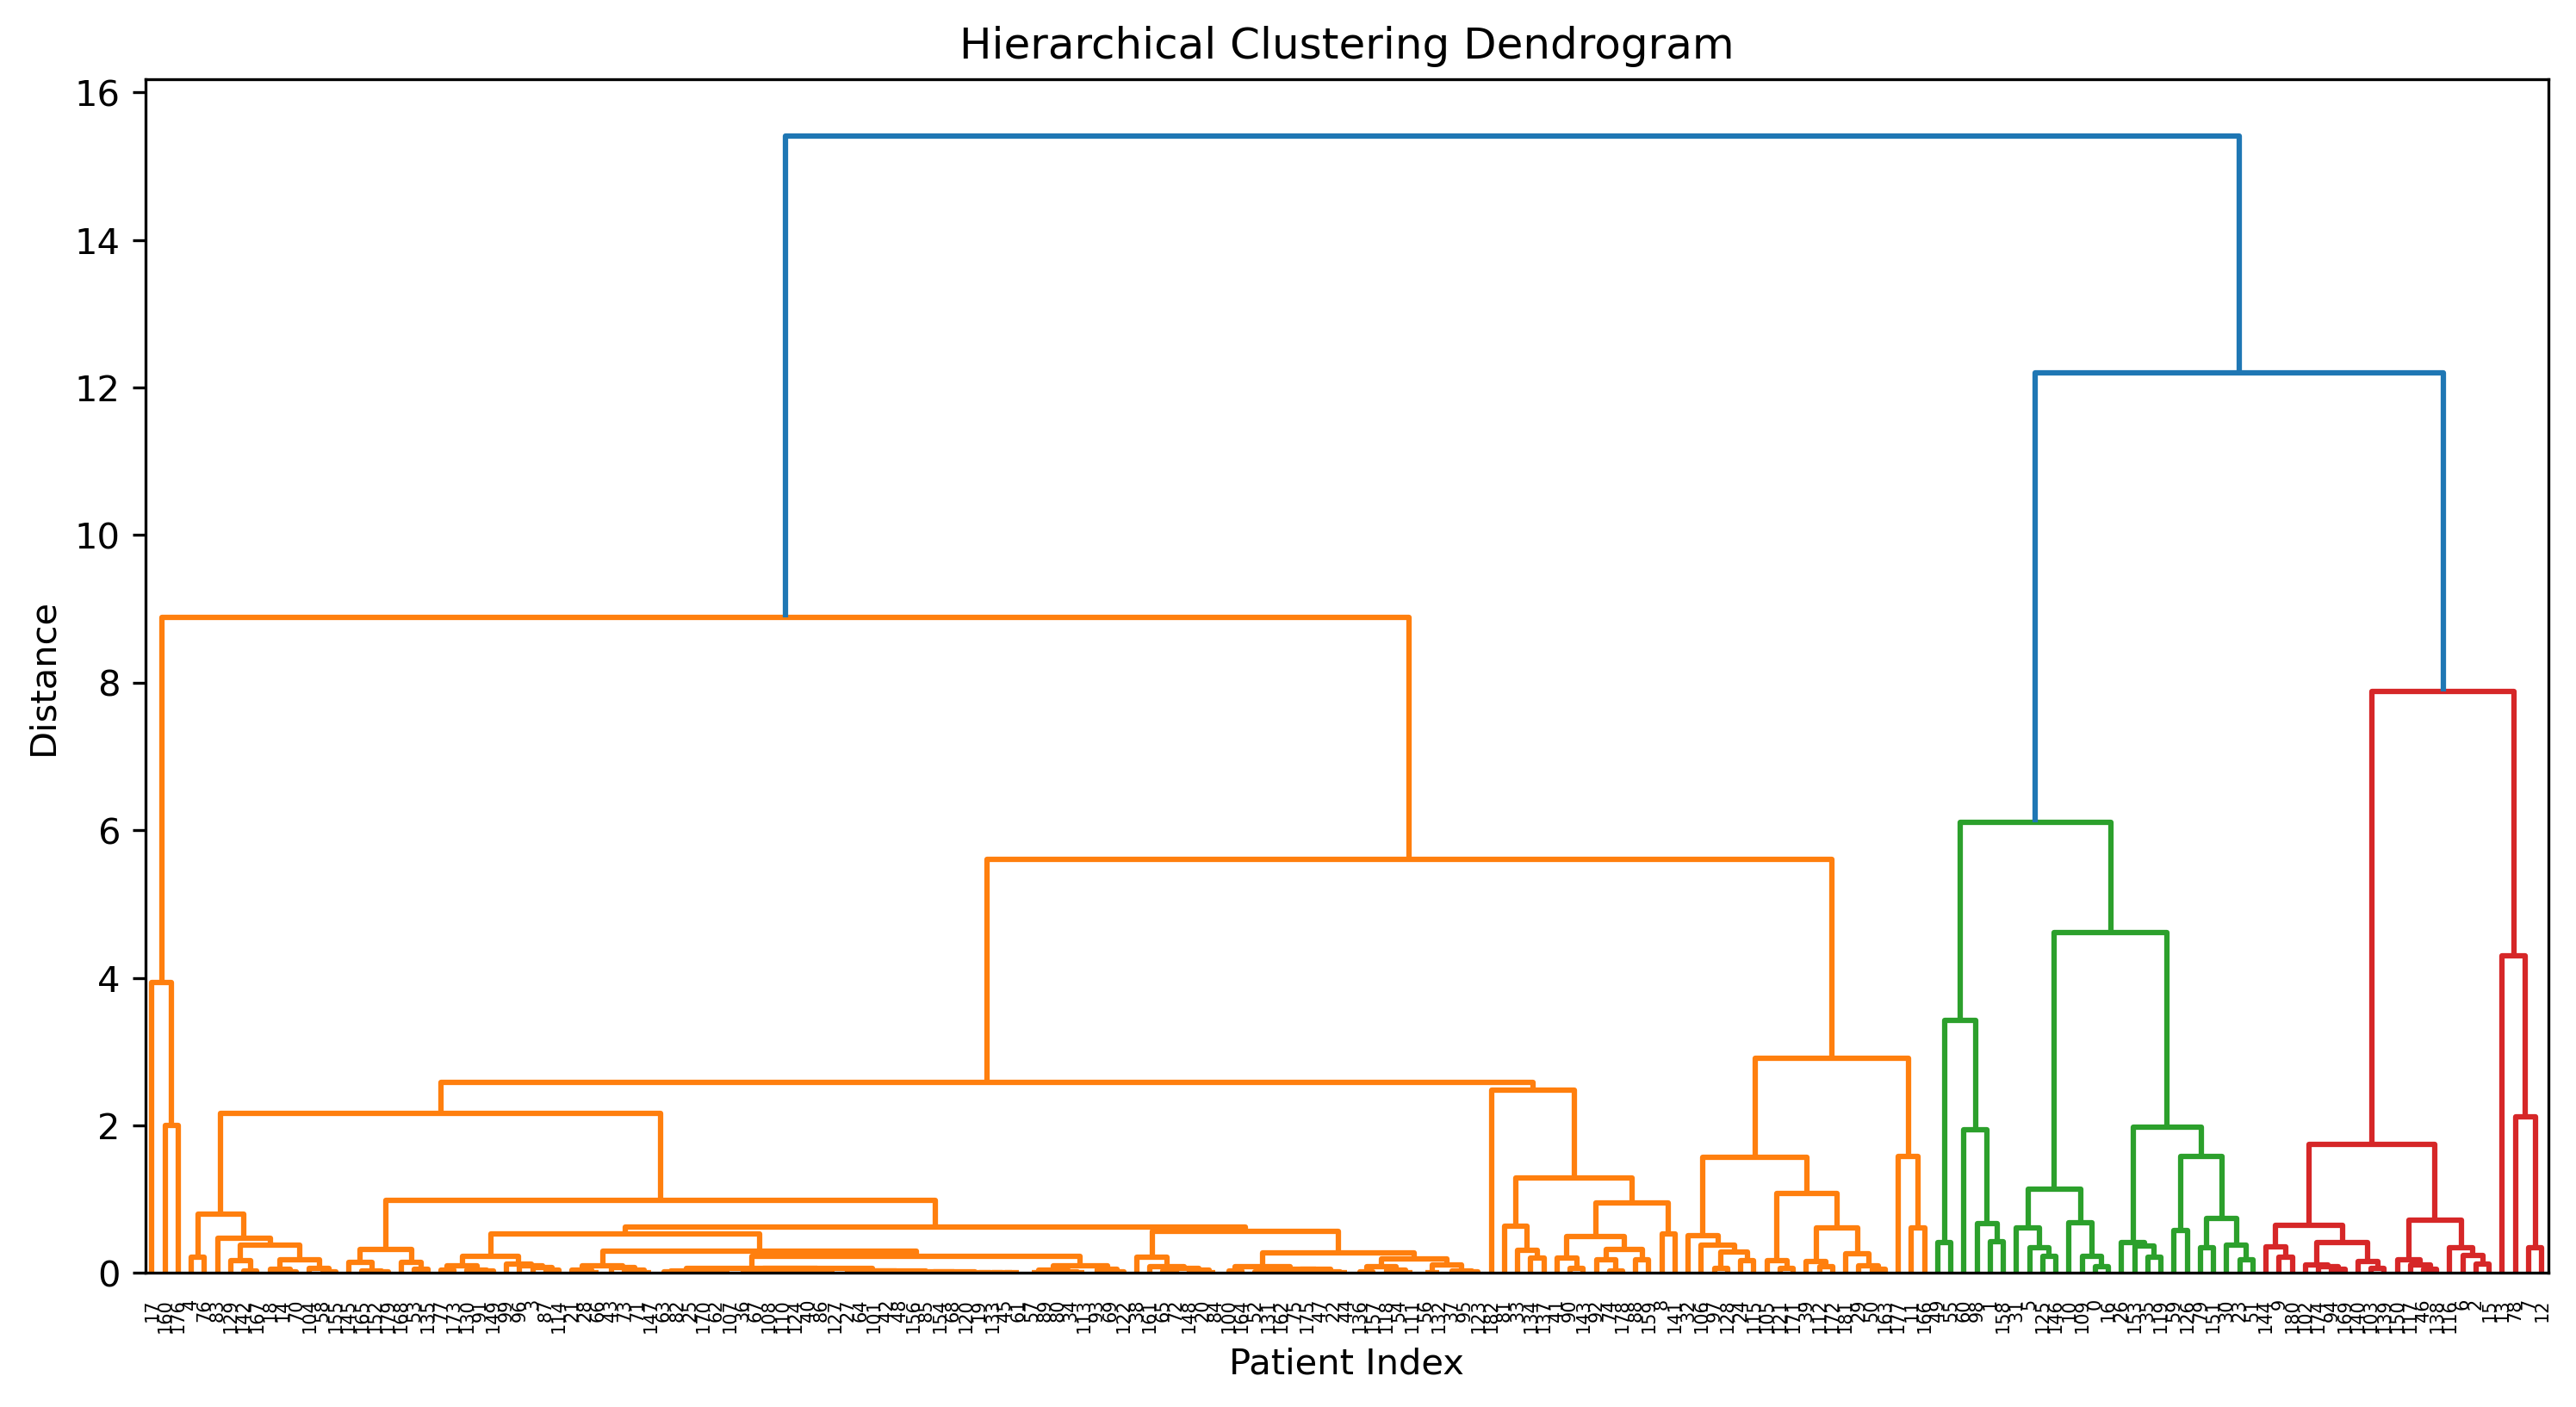

In [7]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Select only mutation columns for clustering
X = df[features].values

# --- 1. Dendrogram ---
plt.figure(figsize=(12, 6), dpi=300)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patient Index")
plt.ylabel("Distance")
plt.show()

In [8]:
# --- 2. Apply Hierarchical Clustering (choose number of clusters, e.g., 2) --

n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['Cluster'] = hc.fit_predict(X) + 1

# --- 3. Check Results ---
print(df[['SAMPLE_ID', 'MUC1', 'MUC4', 'MUC2', 'Cluster']].head())

# --- 4. Optional: Save the dataframe with cluster labels ---
df.to_csv("OneDrive - Umich/Course/CHE 696 006/Final project/MUC/clustered_dataframe.csv", index=False)

      SAMPLE_ID      MUC1      MUC4      MUC2  Cluster
0  TCGA-IB-7887 -0.463240  1.642995 -1.663734        3
1  TCGA-HV-A5A3  1.341920  2.744113  0.239315        3
2  TCGA-2L-AAQA  1.742698 -0.057177  0.239315        2
3  TCGA-IB-AAUQ -0.532797 -0.068588  0.239315        1
4  TCGA-IB-A5SQ  0.311819 -0.405199 -0.067628        1


Average silhouette score: 0.608


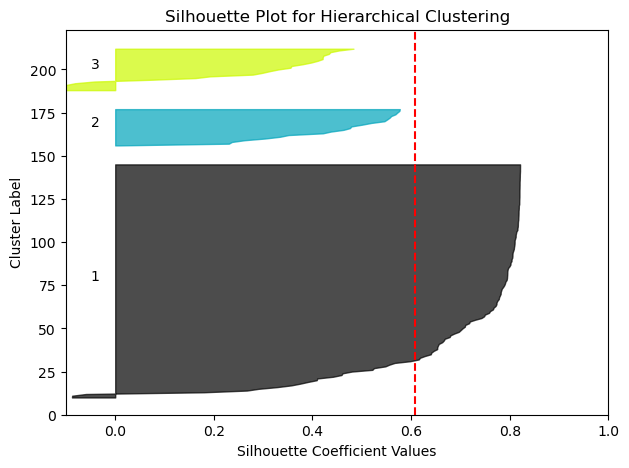

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Get cluster labels from your DataFrame
cluster_labels = df['Cluster'].values

# --- 3. Compute the overall average silhouette score ---
silhouette_avg = silhouette_score(X, cluster_labels)
print("Average silhouette score: {:.3f}".format(silhouette_avg))

# --- 4. Compute silhouette scores for each sample ---
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# --- 5. Create the silhouette plot ---
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))

# Set the silhouette coefficient range for the x-axis
ax1.set_xlim([-0.1, 1])
# The y-axis will be sized to fit all samples plus space for separating clusters.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(1, n_clusters + 1):
    # Aggregate silhouette scores for samples in cluster i, and sort them.
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Select a color from the colormap: adjust index since cluster labels start at 1.
    color = cm.nipy_spectral(float(i - 1) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers in the middle.
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # Gap between clusters

# Draw a red dashed vertical line for the average silhouette score.
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_title("Silhouette Plot for Hierarchical Clustering")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")

plt.show()


In [10]:
from scipy.stats import kstest

# Apply KS test assuming standard normal distribution (mean=0, std=1)
for col in features:
    values = df[col].dropna()
    ks_stat, p_value = kstest(values, 'norm')  # Defaults to mean=0, std=1
    
    print(f"\n🔬 Kolmogorov–Smirnov Test for {col}")
    print(f"KS Statistic: {ks_stat:.4f}, p-value: {p_value:.5f}")
    
    if p_value < 0.05:
        print("⚠️ NOT normally distributed → use Mann–Whitney U test")
    else:
        print("✅ Appears normally distributed → use Welch t-test")


🔬 Kolmogorov–Smirnov Test for MUC1
KS Statistic: 0.2449, p-value: 0.00000
⚠️ NOT normally distributed → use Mann–Whitney U test

🔬 Kolmogorov–Smirnov Test for MUC4
KS Statistic: 0.2710, p-value: 0.00000
⚠️ NOT normally distributed → use Mann–Whitney U test


In [11]:
from scipy.stats import kruskal
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

# Create a new variable combining clusters:
# Group 1: Clusters 1 and 2; Group 2: Clusters 3 and 4.
df['Combined_Group'] = df['Cluster'].apply(lambda x: 1 if x in [3] else 2)

# Print counts to check
print(df['Combined_Group'].value_counts())

# --- 4. Optional: Save the dataframe with cluster labels ---
df.to_csv("OneDrive - Umich/Course/CHE 696 006/Final project/MUC/cluster_combine.csv", index=False)

from scipy.stats import mannwhitneyu

# Loop through each MUC feature and perform Mann–Whitney U test
features = ['MUC1', 'MUC2', 'MUC4']
for gene in features:
    group1 = df[df['Combined_Group'] == 1][gene].dropna()
    group2 = df[df['Combined_Group'] == 2][gene].dropna()
    
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    
    print(f"🔬 Mann–Whitney U Test for {gene}")
    print(f"U Statistic = {stat:.4f}, p-value = {p:.5f}")
    
    if p < 0.05:
        print("✅ Significant difference between clusters\n")
    else:
        print("⚠️ No significant difference found\n")

df['Risk'] = df['Cluster'].map(lambda x: 'Low-risk' if x in [1,2] else 'High-risk')
print(df['Risk'].value_counts())


Combined_Group
2    158
1     25
Name: count, dtype: int64
🔬 Mann–Whitney U Test for MUC1
U Statistic = 2465.5000, p-value = 0.04645
✅ Significant difference between clusters

🔬 Mann–Whitney U Test for MUC2
U Statistic = 1897.5000, p-value = 0.75411
⚠️ No significant difference found

🔬 Mann–Whitney U Test for MUC4
U Statistic = 3934.0000, p-value = 0.00000
✅ Significant difference between clusters

Risk
Low-risk     158
High-risk     25
Name: count, dtype: int64


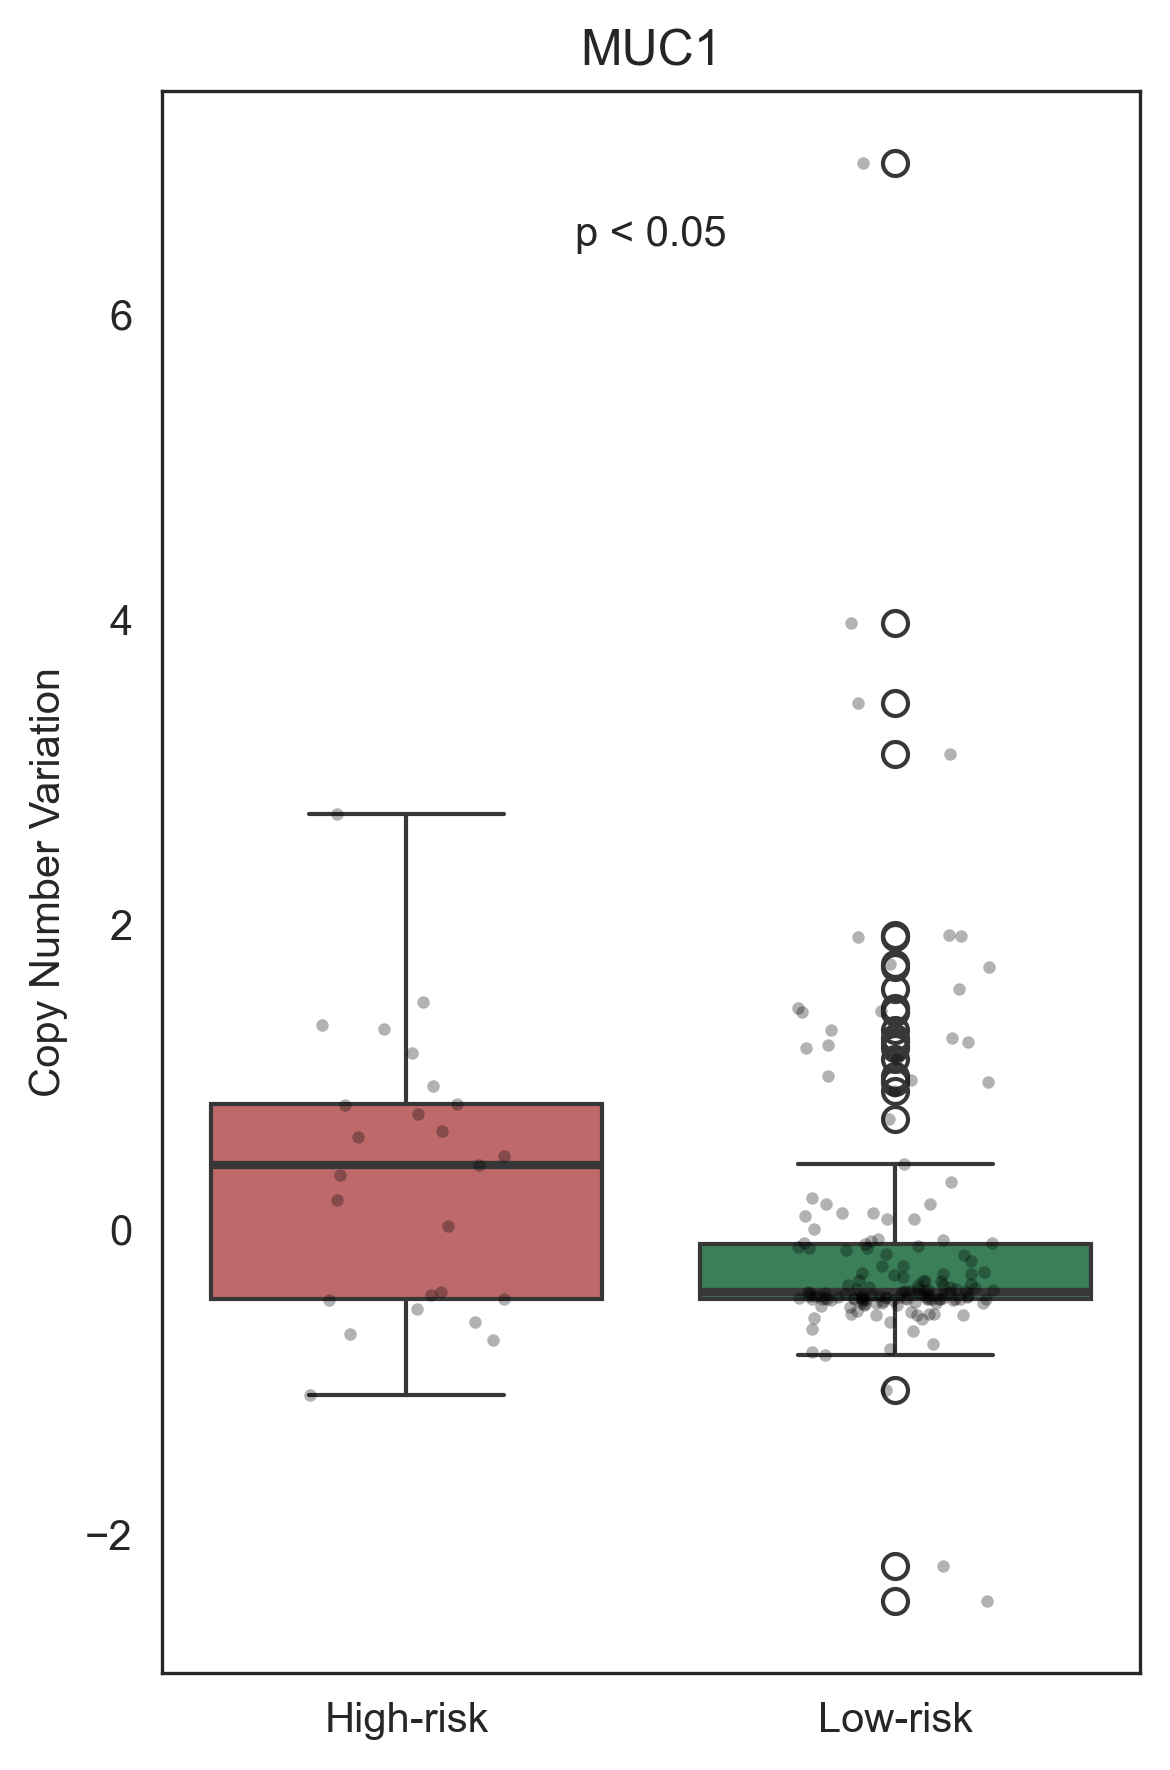

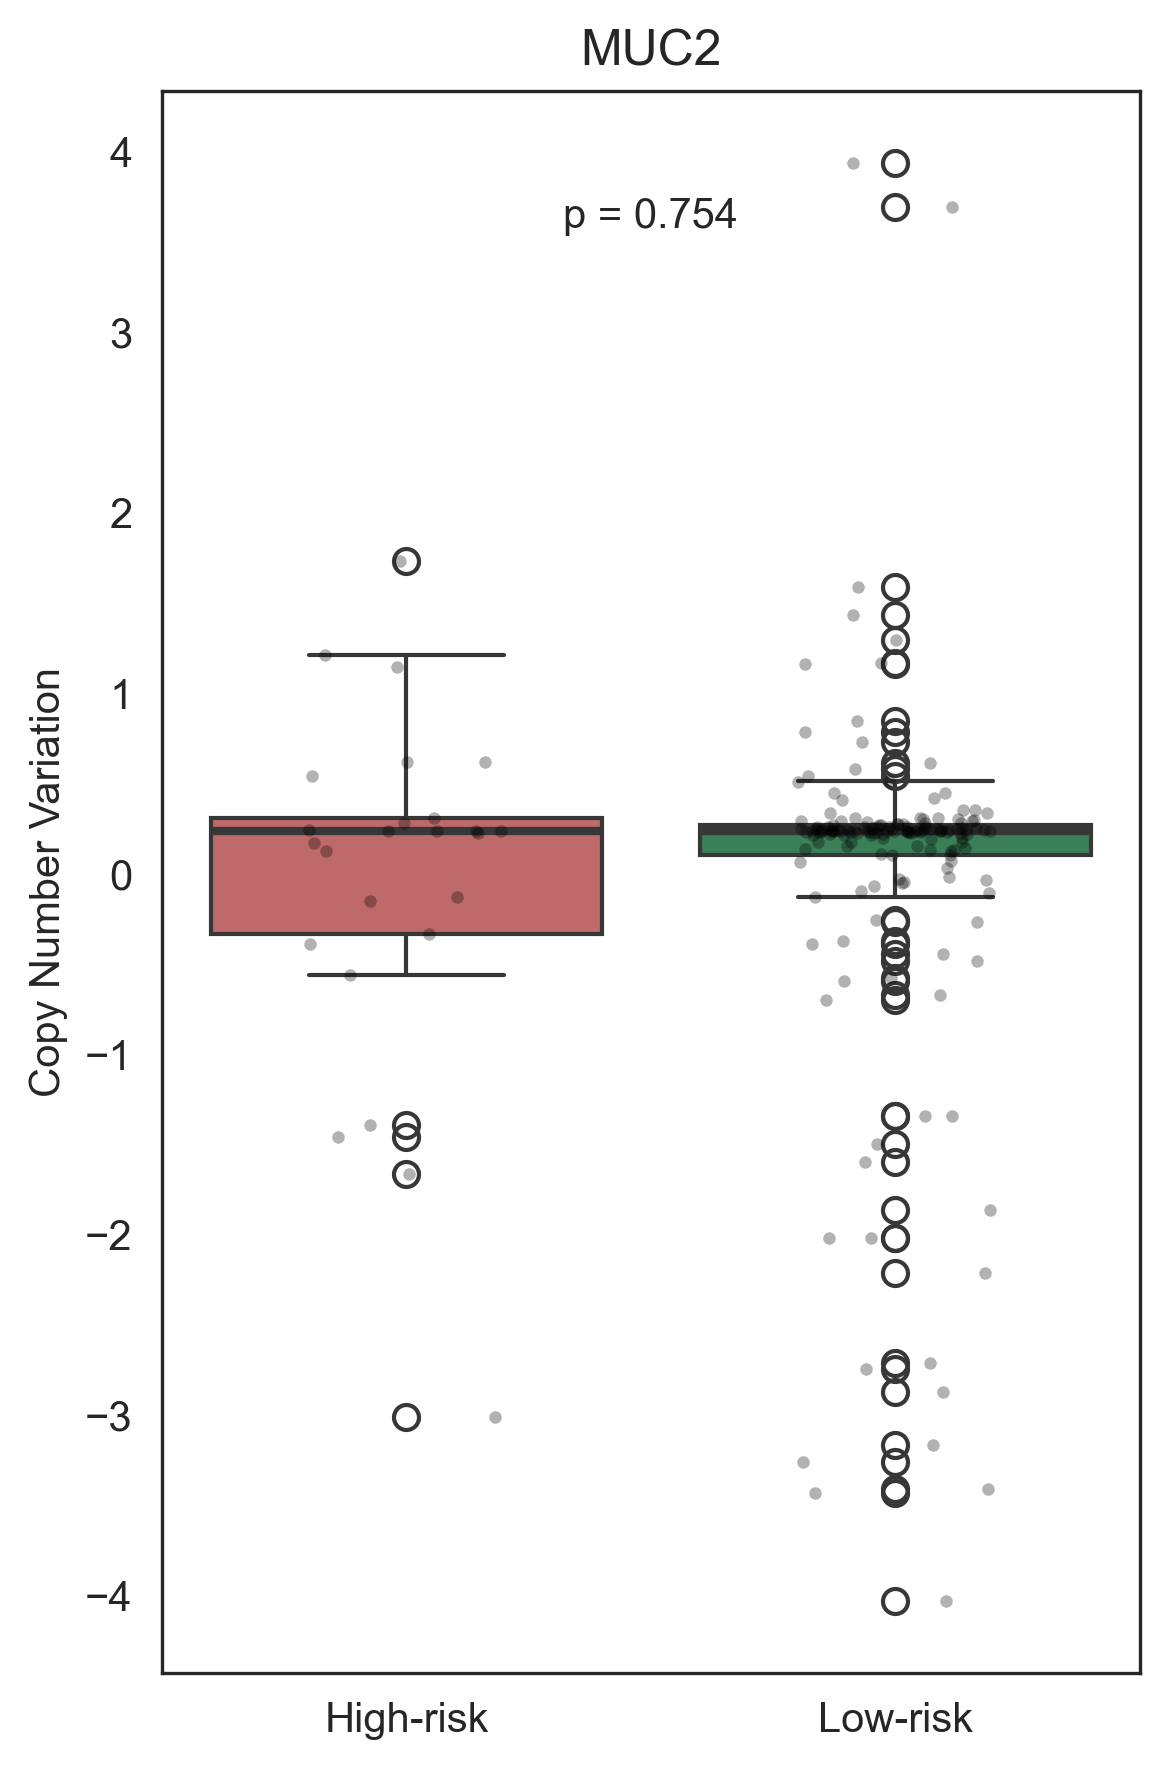

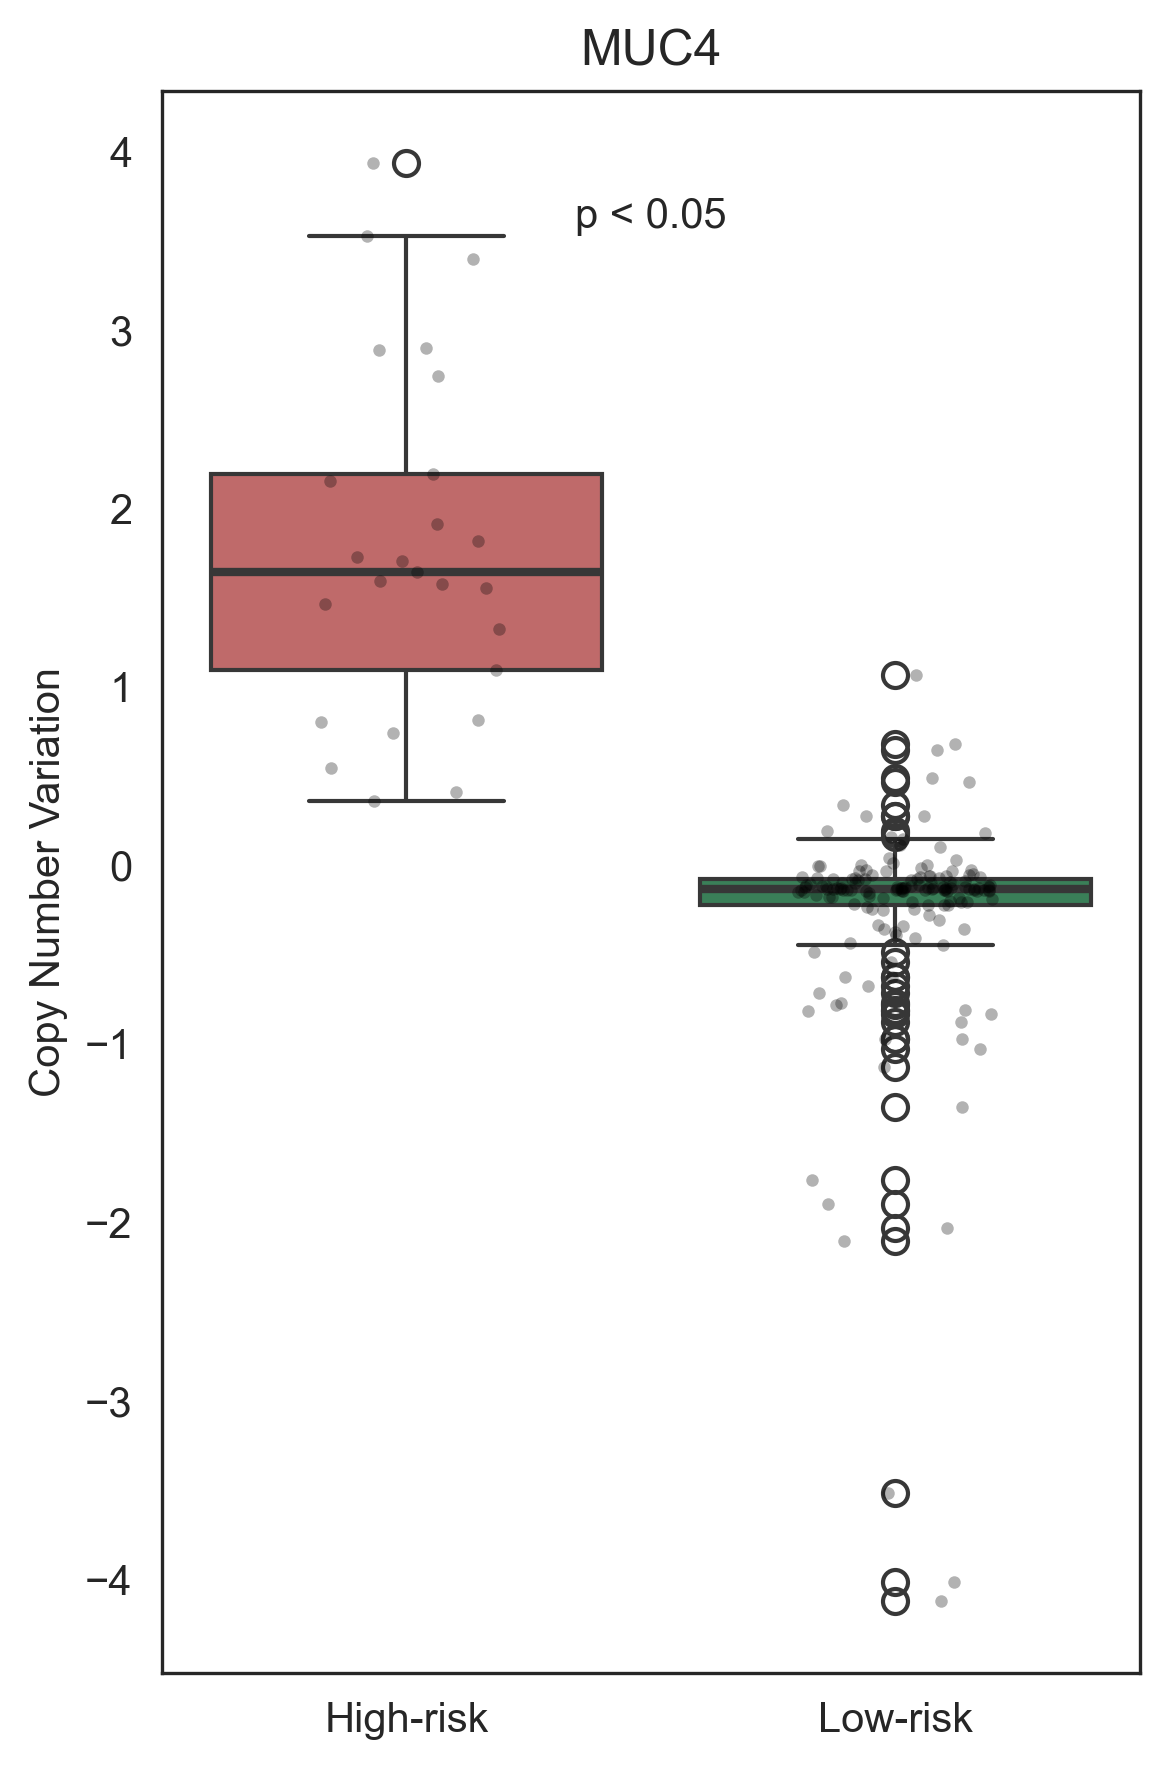

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# map Combined_Group once at the top
df['Risk'] = df['Combined_Group'].map({1: 'High-risk', 2: 'Low-risk'})

features = ['MUC1','MUC2','MUC4']
palette = {'Low-risk':'seagreen','High-risk':'indianred'}
sns.set_style("white")

for gene in features:
    plt.figure(figsize=(4,6), dpi=300)
    
    # now we explicitly say hue="Risk"
    sns.boxplot(
        data=df,
        x='Risk',
        y=gene,
        hue='Risk',
        palette=palette,
        dodge=False,      # so boxes don’t get side-by-side
        showcaps=True,
        boxprops={'linewidth':1},
        whiskerprops={'linewidth':1},
        medianprops={'linewidth':2},
        legend=False      # turn off the extra legend
    )
    sns.stripplot(
        data=df,
        x='Risk',
        y=gene,
        color='black',
        alpha=0.3,
        jitter=0.2,
        size=3
    )

    # Mann–Whitney U
    g1 = df.loc[df['Risk']=='Low-risk', gene].dropna()
    g2 = df.loc[df['Risk']=='High-risk', gene].dropna()
    stat, p = mannwhitneyu(g1, g2, alternative='two-sided')
    p_text = "p < 0.05" if p<0.05 else f"p = {p:.3g}"
    
    # annotate
    plt.title(f"{gene}")
    plt.xlabel("")            # Risk is on the x-axis already
    plt.ylabel("Copy Number Variation")
    ymax = df[gene].max()
    plt.text(0.5, ymax*0.95, p_text,
             ha='center', va='top', fontsize=10)

    plt.tight_layout()
    plt.savefig(f"{gene}_CNV_boxplot.png", dpi=300, bbox_inches='tight')
    plt.show()


In [14]:
# 3. Univariate Cox model for hazard ratio --> * Purpose: compare the two clusters to see if they can predict survival difference
# Convert cluster into a binary indicator for the model: 1->0, 2->1
df_cox = df[['Time_months', 'Status', 'Combined_Group']].copy()
df_cox['Cluster_binary'] = df_cox['Combined_Group'].map({1:0, 2:1})  # reference = cluster 1

cph1 = CoxPHFitter()
cph2 = CoxPHFitter()
cph3 = CoxPHFitter()

cph.fit(
    df_cox[['Time_months', 'Status', 'Cluster_binary']], 
    duration_col='Time_months', 
    event_col='Status'
)
print(cph.summary)

# 2. Univariate on each gene separately
for gene in ['MUC1','MUC4']:
    cph2.fit(df, duration_col='Time_months', event_col='Status', formula=gene)
    print(f"=== Univariate: {gene} ===")
    print(cph2.summary[['coef', 'exp(coef)', 'p']])
    print()

# 3. Multivariate on both MUC1 + MUC4
cph3.fit(df, duration_col='Time_months', event_col='Status', formula='MUC1 + MUC4')
print("=== Multivariate: MUC1 + MUC4 ===")
print(cph3.summary[['coef', 'exp(coef)', 'p']])

import numpy as np
# Extract HR, lower & upper confidence intervals
# The row name should be "Cluster_binary" in cph.summary
hr = cph.hazard_ratios_['Cluster_binary']
lower = cph.confidence_intervals_.loc['Cluster_binary', '95% lower-bound']
upper = cph.confidence_intervals_.loc['Cluster_binary', '95% upper-bound']

lower_exp = np.exp(lower)
upper_exp = np.exp(upper)

# Perform log-rank test between the two groups
group1 = df[df['Combined_Group'] == 1]
group2 = df[df['Combined_Group'] == 2]

results = logrank_test(
    group1['Time_months'],
    group2['Time_months'],
    event_observed_A=group1['Status'],
    event_observed_B=group2['Status']
)

logrank_p = results.p_value
print(results)

                    coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                       
Cluster_binary -0.703161   0.495018  0.269389       -1.231154       -0.175168   

                exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                    
Cluster_binary             0.291956             0.839316     0.0 -2.610207   

                       p  -log2(p)  
covariate                           
Cluster_binary  0.009049  6.788067  
=== Univariate: MUC1 ===
               coef  exp(coef)         p
covariate                               
MUC1       0.005918   1.005936  0.944467

=== Univariate: MUC4 ===
              coef  exp(coef)         p
covariate                              
MUC4       0.33494   1.397857  0.000518

=== Multivariate: MUC1 + MUC4 ===
               coef  exp(coef)         p
covariate                               

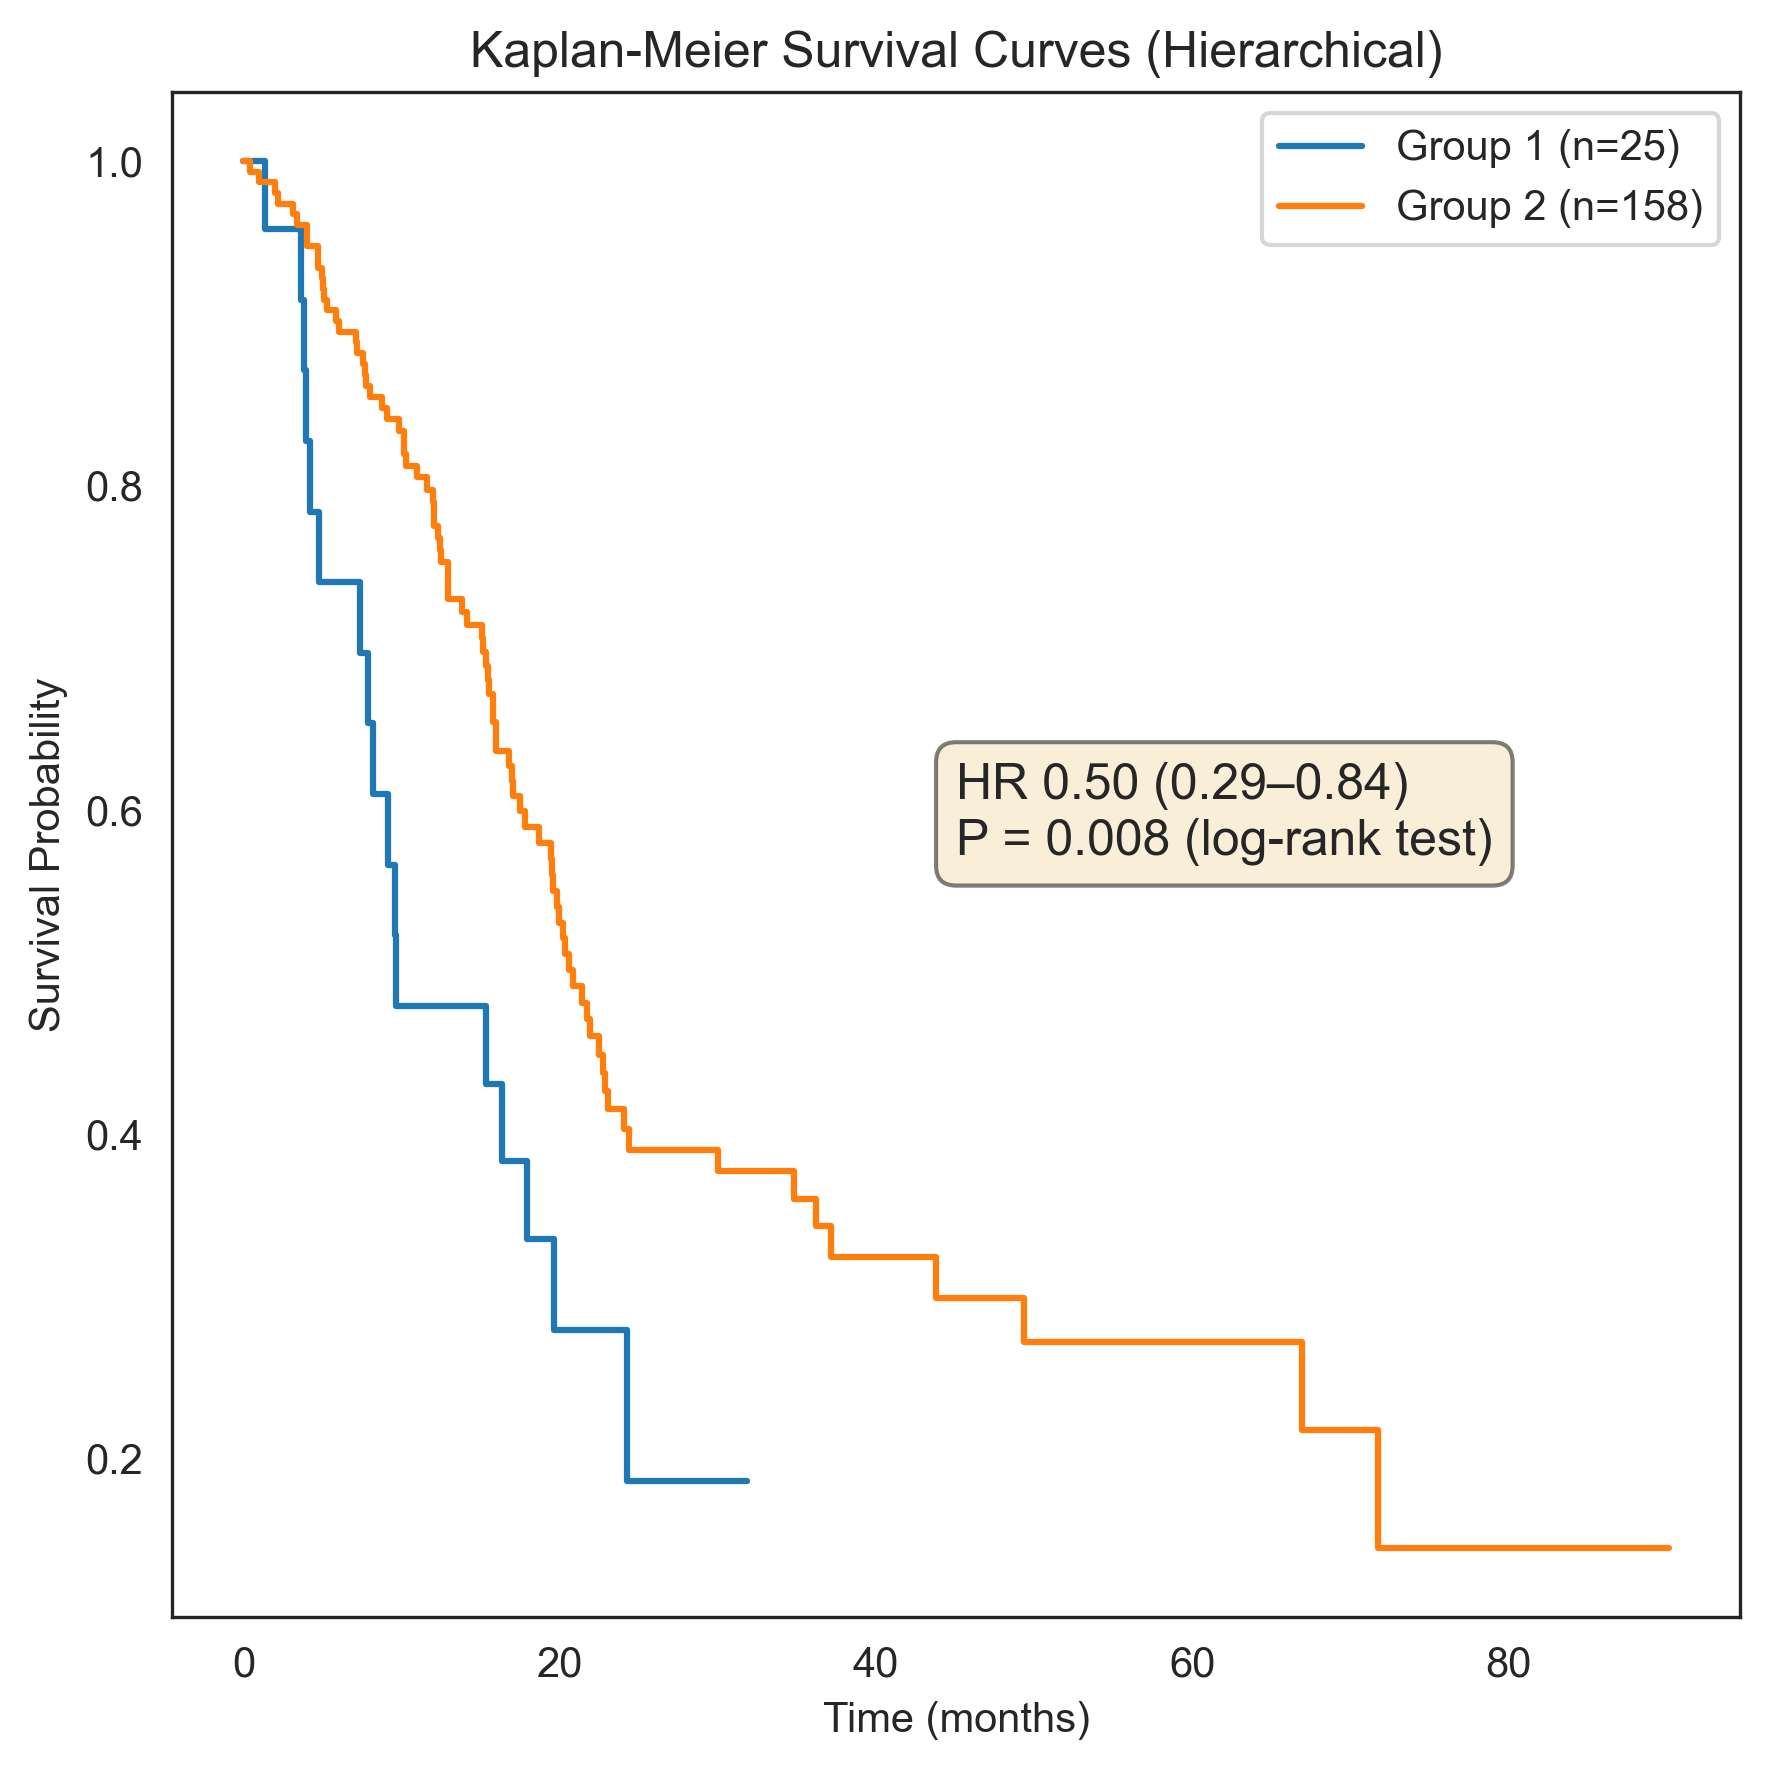

In [15]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Create one figure and axis
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
kmf = KaplanMeierFitter()

# Plot KM curves for each group on the same axis
for group in sorted(df['Combined_Group'].unique()):
    group_data = df[df['Combined_Group'] == group]
    kmf.fit(
        durations=group_data['Time_months'],
        event_observed=group_data['Status'],
        label=f"Group {group} (n={len(group_data)})"
    )
    kmf.plot_survival_function(ax=ax, ci_show=False)

ax.set_title("Kaplan-Meier Survival Curves (Hierarchical)")
ax.set_xlabel("Time (months)")
ax.set_ylabel("Survival Probability")
ax.legend(loc='best')

# Build the annotation string based on the log-rank p-value
if logrank_p < 0.001:
    annotation = f"HR {hr:.2f} ({lower_exp:.2f}–{upper_exp:.2f})\nP < 0.001 (log-rank test)"
else:
    annotation = f"HR {hr:.2f} ({lower_exp:.2f}–{upper_exp:.2f})\nP = {logrank_p:.3f} (log-rank test)"

# Add annotation to the same axis (using axis coordinates)
ax.text(0.5, 0.5, annotation, transform=ax.transAxes, fontsize=12,
        bbox=dict(boxstyle="round,pad=0.4", fc="wheat", ec="black", alpha=0.5))
  
plt.tight_layout()
plt.savefig(f"Hierarchical_clustering.png", dpi=300, bbox_inches='tight')
plt.show()